# Stationary Series 

일반적으로 time series 데이터를 다룰때 데이터는 staionary 데이터라는 가정이 전제로 시작을 합니다. <br>
시계열 데이터가 stationary일때 다음의 특징을 갖고 있습니다.

1. constant mean 
2. constant variance 
3. 시간에 종속되지 않은 autocovariance 

>  Non-Stationary의 대표적인 예는 random walk가 있습니다.

### 평균은 시간대비 일정해야 한다. 

왼쪽 그래프의 경우 constant mean을 갖고 있지만, 오른쪽 그래프의 경우 시간이 지남에 따라 서로 다른 평균값을 갖습니다.

<img src="images/Mean_nonstationary.png">

### 분산은 시간대비 일정해야 한다. 

오른쪽 그래프의 경우 시간대비 평균값에서 편차가 점점 더 커지는 것을 알수 있습니다. <br>
즉 분산값이 달라진다는 것인데 이렇게 되면 non-stationary series로 정의됩니다.

<img src="images/Var_nonstationary.png">

### Covariance는 시간대비 일정해야 한다. 

오른쪽 그래프의 경우 시간이 지나면서 점점더 좁아지는 것을 알수 있습니다.<br>
즉 처음시간대와 나중시간대의 covariance값이 바뀐다는 뜻이며 이는 non-stationary를 의미합니다.

<img src="images/Cov_nonstationary.png">

# Air Passengers Data

## Loading Data

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [40]:
data = pd.read_csv('../../data/time-series/international-airline-passengers.csv', 
                   names=['month', 'passenger'],
                   skiprows=1)

data['month'] = pd.to_datetime(data['month'], format='%Y-%m') # Convert string -> datetime
x = data['month'].as_matrix()
y = data['passenger'].as_matrix()

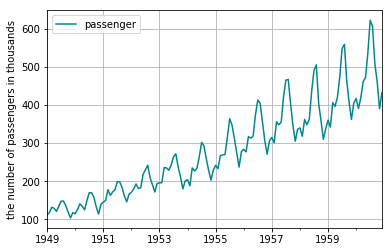

In [3]:
data.plot(x='month', y='passenger', color='#01878D')
ylabel('the number of passengers in thousands')
xlabel('')
legend(loc='upper left')
grid()

위의 그래프만 봐도 전반적으로 증가하는 **trend**를 갖고 있으며,<br>
주기적인 변동성(periodic fluctuation).. 즉 **seasonality**를 갖고 있는것을 확인할 수 있습니다.

# Checking Stationality of a Time Series 

## Simple Moving Average

Trend를 읽고자 할때 moving average를 사용할수 있습니다.<br>
특히 주식에서 일별 변동을 정확하게 보는것이 아니라 좀 더 smooth 하게 만들어서 흐름을 볼수 있도록 만들어 줍니다.<br>
즉 SMA는 data visualization을 통해서 직관적으로 **trend**를 알 수 있도록 만들어 줍니다.

예를 들어서 다음과 같은 일별 주식 가격이 sequence로 있습니다.

$$ s = \{ 3\ \  10\ \  2\ \  7\ \  5\ \  6\ \  3\ \  1\ \  2 \} $$

3-days moving average를 구하기 위해서 다음과 같이 합니다.

$$ \frac{3 + 1 + 2}{3} = 2.0  $$

여기서 moving이 들어가는 이유는 저기 3개의 값을 기준으로 차례차례 평균을 구하기 때문입니다.<br>
(따라서 1d convolution을 사용하는것과 같습니다.)<br>
$ s $ 의 MA값은 다음과 같습니다.

$$ MA = \{5\ \ 6.3\ \  4.6\ \  6\ \  4.6\ \  3.3\ \  2\ \  2.3 \} $$




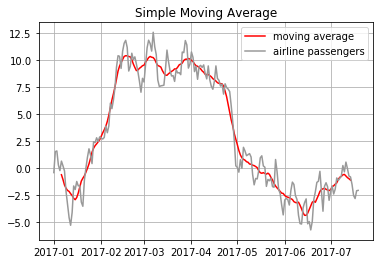

In [220]:
ts = pd.Series(np.random.randn(200), index=pd.date_range('1/1/2017', periods=200)).cumsum()

# Simple Moving Average를 구합니다. 
N = 11
sma = np.convolve(ts, np.ones(N)/N, mode='valid')

# Plotting
plot(ts.index[int(N/2):-int(N/2)], sma, color='red', label='moving average')
plot(ts.index, ts.data, color='#999999', label='airline passengers')
grid()
legend()
title('Simple Moving Average')

##  Simple Moving Variance 

위에서는 convolution을 사용하였지만, Pandas에서는 이미 Moving/Rolling 함수들을 지원하고 있습니다.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).var()
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


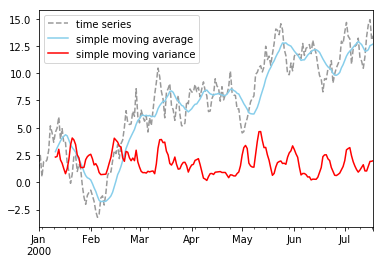

In [173]:
ts = pd.Series(np.random.randn(200), index=pd.date_range('1/1/2000', periods=200)).cumsum()
smv = pd.rolling_var(ts, 11) # Simple Moving Variance
sma = pd.rolling_mean(ts, 11) # Simple Moving Average

ts.plot(color='#999999', style='--', label='time series')
sma.plot(color='skyblue', label='simple moving average')
smv.plot(color='red', label='simple moving variance')
legend()

# References 
 * [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)
 * [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)